In [1]:
import numpy as np
from pyscf import fci

Exact

In [2]:
from scipy.integrate import quad
from scipy.special import *

U = []
E_LW = []

for Ui in np.linspace(1,10,6):
    Ei, err = quad(lambda x: j0(x) * j1(x) / (x * (1 + np.exp(Ui * x / 2))),0, 200)
    U.append(Ui)
    E_LW.append(-4*Ei)

print(E_LW[0])
print(err)

-1.040368653394435
8.675909540485985e-11


/var/folders/gf/7vfqp7nn2972hrcz727tkjkh0000gn/T/ipykernel_95820/2392234220.py:8: RuntimeWarning: overflow encountered in exp
  Ei, err = quad(lambda x: j0(x) * j1(x) / (x * (1 + np.exp(Ui * x / 2))),0, 200)


Text(0.5, 1.0, 'Lieb-Wu Solution for the Hubbard Model')

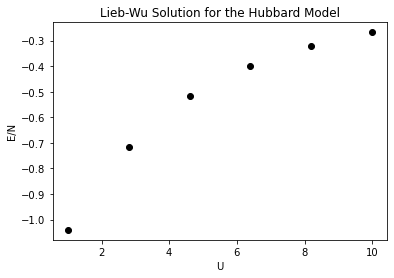

In [3]:
import matplotlib.pyplot as plt
plt.plot(U,E_LW,'ok')
plt.ylabel("E/N")
plt.xlabel("U")
plt.title("Lieb-Wu Solution for the Hubbard Model")

In [4]:
""" 2 site hubbard model with 2 electrons. Should return U=\frac{1}{2}\left[U-\sqrt{U^{2}+16 t^{2}}\right]$
numerical result is -1.561552812 """

#numpy.random.seed(1)
norb = 2
nelec = (1,1)

h1 = np.zeros([norb,norb])
h1[(1,0)] = -1.0

h1 = h1 + h1.T

U=[]
E2=[]
for Ui in np.linspace(1,10,6):
    h2 = np.zeros((norb,norb,norb,norb))
    h2[(0,0,0,0)] = Ui
    h2[(1,1,1,1)] = Ui
    
    H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=4)[1]
    e_all, v_all = np.linalg.eigh(H_fci)
    
    e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=40,
                                        max_space=30, max_cycle=100)
    U.append(Ui)
    E2.append(e[0])

print('U=1:')
print('energy', E2[0])

U=1:
energy -1.561552812808828


In [46]:
#numpy.random.seed(1)
E = []
norbs = np.linspace(2, 8, 4).astype(int)
for norb in norbs:
    print(norb)
    nelec = (norb//2,norb//2)

    h1 = np.zeros([norb,norb])
    for n in range(norb):
        h1[(n,(n+1)%norb)] = -1.0

    h1 = h1 + h1.T
    print(h1)
    U=[]
    E_tmp=[]
    for Ui in np.linspace(1,10,6):
        h2 = np.zeros((norb,norb,norb,norb))
        for n in range(norb):
            h2[(n,n,n,n)] = Ui

        H_fci = fci.direct_spin1.pspace(h1, h2, norb, nelec, np=4)[1]
        e_all, v_all = np.linalg.eigh(H_fci)

        e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=10,
                                            max_space=30, max_cycle=100)
        U.append(Ui)
        E_tmp.append(e[0])
    E.append(E_tmp)
    
E = np.array(E)

2
4
6
8


Text(0.5, 1.0, 'Lieb-Wu Solution and FCI Solutions for Finite Systems')

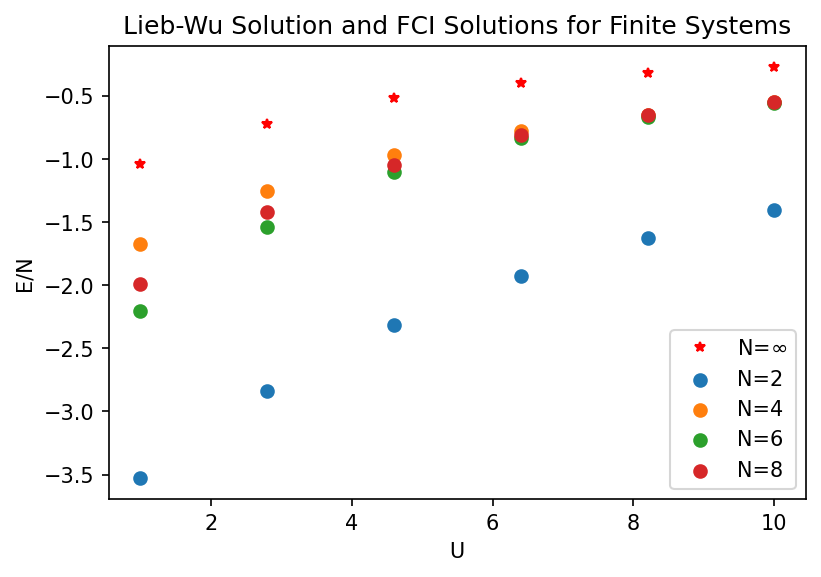

In [41]:
plt.figure(dpi=150)

for e, norb in zip(E, norbs):
    natoms = norb//2
    plt.scatter(U , np.array(e)/natoms, label=f"N={norb}")

plt.plot(U,E_LW,'*',markersize=5, c='r', label='N=$\infty$')

plt.legend()
plt.ylabel("E/N")
plt.xlabel("U")

plt.title("Lieb-Wu Solution and FCI Solutions for Finite Systems")

In [45]:
E

array([[-3.53112887, -2.83792402, -2.3141088 , -1.92249939, -1.6280014 ,
        -1.40312424],
       [-3.34084762, -2.49793036, -1.94109827, -1.56182674, -1.29468933,
        -1.09987777],
       [-6.60115829, -4.61119783, -3.30065389, -2.5034354 , -2.00221107,
        -1.66436273],
       [-7.9523256 , -5.66636391, -4.18070058, -3.23219435, -2.60811641,
        -2.17668812]])